In [41]:
# Importing necessary libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [42]:
# Using random.seed for reproducibility
np.random.seed(0)
n_samples = 500

In [43]:
# Initializing distribution 1 parameters and data (Class 1)
mu1 = [2, 2]
sigma1 = [[0.9, -0.0255], [-0.0255, 0.9]]
data1 = np.random.multivariate_normal(mu1, sigma1, n_samples)
labels1 = np.zeros((n_samples, 1))

In [44]:
# Initializing distribution 2 parameters and data (Class 2)
mu2 = [5, 5]
sigma2 = [[0.5, 0], [0, 0.3]]
data2 = np.random.multivariate_normal(mu2, sigma2, n_samples)
labels2 = np.ones((n_samples, 1))

In [45]:
# Combining both distributions and labels
data = np.vstack((data1, data2))
labels = np.vstack((labels1, labels2))

In [46]:
# Including bias term by adding a column of ones in feature matrix
bias = np.ones((data.shape[0], 1))
data_bias = np.hstack((bias, data))

In [62]:
# Spliting dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data_bias, labels, test_size=0.2, random_state=0)

In [63]:
# Defining step activation function
def step_activation(x):
    return np.where(x >= 0, 1, 0)

In [64]:
# Defining perceptron training function
def perceptron_train(X, y, learning_rate=0.1, max_epochs=1000):
    n_samples, n_features = X.shape
    weights = np.random.rand(n_features)
    for epoch in range(max_epochs):
        errors = 0
        for idx, x_i in enumerate(X):
            linear_output = np.dot(x_i, weights)
            y_pred = step_activation(linear_output)
            update = learning_rate * (y[idx] - y_pred)
            weights += update * x_i
            errors += int(update != 0.0)
        if errors == 0:
            print(f'Converged at epoch {epoch}')
            break
    return weights

In [65]:
# Training perceptron on training set
weights = perceptron_train(X_train, y_train, learning_rate=0.1, max_epochs=1000)

In [66]:
# Making predictions and computing confusion matrix
y_pred = step_activation(np.dot(X_test, weights))
cm = confusion_matrix(y_test, y_pred)
accuracy = np.mean(y_pred == y_test)
print(f"Test Accuracy: {accuracy:.2f}")

Test Accuracy: 0.50


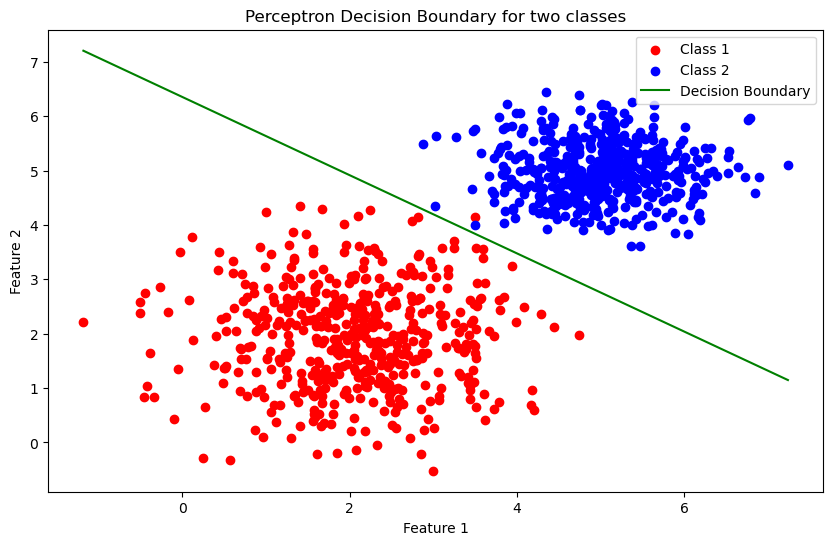

In [67]:
# Plotting the decision boundary
def plot_decision_boundary(X, y, weights):
    plt.figure(figsize=(10, 6))
    plt.scatter(X[y.flatten() == 0, 1], X[y.flatten() == 0, 2], color='red', label='Class 1')
    plt.scatter(X[y.flatten() == 1, 1], X[y.flatten() == 1, 2], color='blue', label='Class 2')
    x_values = np.linspace(min(X[:, 1]), max(X[:, 1]), 100)
    y_values = -(weights[0] + weights[1] * x_values) / weights[2]
    plt.plot(x_values, y_values, color='green', label='Decision Boundary')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Perceptron Decision Boundary for two classes')
    plt.legend()
    plt.show()

plot_decision_boundary(data_bias, labels, weights)

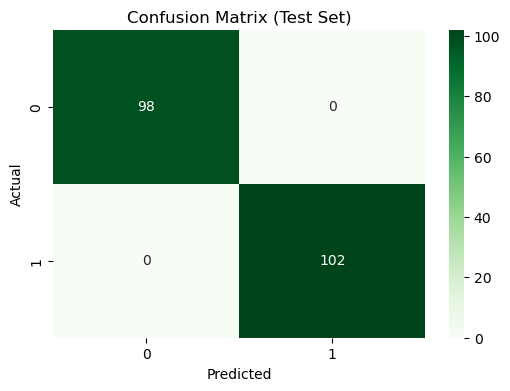

In [68]:
# Plotting the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Test Set)')
plt.show()

# Report

## 1. What are the parallels between Biological NNs and Artificial NNs? List any three.
Ans. Parallels between biological neural networks and artificial neural networks are:
1) Both are composed of interconnected units (neurons) to process the information
2) In both systems, connections (synapses in biological, weights in artificial) determine the strength and influence of signals.
3) Both systems adapt over time, biological networks adjust synaptic strengths through learning mechanisms, while artificial neural networks adjust weights during training.

## 2. What was the McCulloch-Pitts Neuron model? List any two of its limitations. 
Ans. McCulloch-Pitts Neuron model was a binary threshold unit that fires if input exceeds a threshold. Two limitations of the model:
1) The model cannot work for non-linearly separable problems.
2) The weights are fixed (no learning happens).

## 3. How does a perceptron learn? 
Ans. A perceptron learns by iteratively updating its weights based on the difference between its predicted output and the actual label. During each training epoch, it adjusts weights in proportion to the error for each training example using a learning rate. This process, known as the weight update rule, continues until the model converges or reaches a maximum number of epochs.

## 4. List any three activation functions and their respective output ranges. 
Ans. Three activation functions and their respective output ranges are as follows:
1) Step Function- Outputs binary values (either 0 or 1).
2) Sigmoid Function- Outputs values in the range (0,1).
3) ReLU Function- Outputs in the range (0,infinity).

## 5. Why was the classical perceptron not able to solve the XOR problem? Can you suggest a way to solve the XOR problem using neural networks but without going into a higher dimensional space? 
Ans. Since the XOR problem is non-linearly separable problem, therefore classical perceptron fails to solve it. We can use a multi-layer perceptron with hidden layers to look for non-linear patterns in the data without going into a higher dimensional space.